In [ ]:
# neural_network_prediction

2024-02-18 23:43:56.218043: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-18 23:43:58.737121: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 23:43:58.737405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 23:43:59.015329: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 23:44:00.132978: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-18 23:44:00.138726: I tensorflow/core/platform/cpu_feature_guard.cc:1

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 0.0961 - mean_absolute_error: 0.2187 - mean_squared_error: 0.0961
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0574 - mean_absolute_error: 0.1766 - mean_squared_error: 0.0574
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0561 - mean_absolute_error: 0.1820 - mean_squared_error: 0.0561
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0557 - mean_absolute_error: 0.1847 - mean_squared_error: 0.0557
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0553 - mean_absolute_error: 0.1790 - mean_squared_error: 0.0553
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0568 - mean_absolute_error: 0.1965 - mean_squared_error: 0.0568
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0560 - mean_absolute_error: 0.1839 - mean_squared_error: 0.0560
Epoch 8/100
9/9 [========================

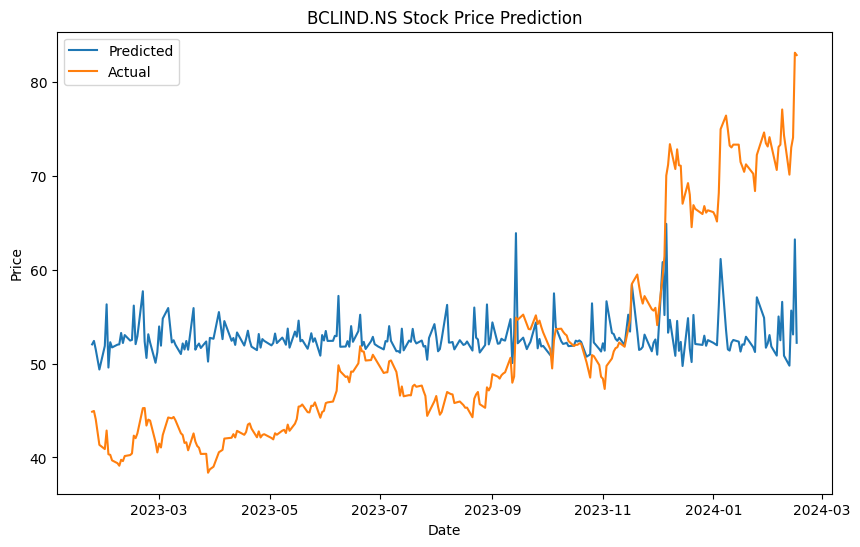

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

# Download and prepare stock data
symbol = 'BCLIND.NS'
start = dt.date.today() - dt.timedelta(days=394)
end = dt.date.today()
df = yf.download(symbol, start, end)
df['Open_Close'] = (df['Open'] - df['Adj Close']) / df['Open']
df['High_Low'] = (df['High'] - df['Low']) / df['Low']
df['Increase_Decrease'] = np.where(df['Volume'].shift(-1) > df['Volume'], 1, 0)
df['Buy_Sell_on_Open'] = np.where(df['Open'].shift(-1) > df['Open'], 1, 0)
df['Buy_Sell'] = np.where(df['Adj Close'].shift(-1) > df['Adj Close'], 1, 0)
df['Returns'] = df['Adj Close'].pct_change()
df = df.dropna()

# Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(df[['Returns']])
Y = scaler.fit_transform(df[['Adj Close']])

# Build a neural network model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='rmsprop', loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])

# Train the model
model.fit(X, Y, epochs=100)

# Predict future stock price
predicted_price = scaler.inverse_transform(model.predict([[0]]))[0][0]
print(f'Predicted Price: {predicted_price}')

# Optional: Plotting the model's predictions (for visualization purposes)
plt.figure(figsize=(10,6))
predicted_prices = model.predict(X)
plt.plot(df['Adj Close'].index, scaler.inverse_transform(predicted_prices), label='Predicted')
plt.plot(df['Adj Close'], label='Actual')
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()